# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [2]:
cancer = pd.read_csv('data.csv')

In [3]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# DATA PREPROCESSING

In [4]:
cancer.shape

(569, 33)

In [5]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
cancer = cancer.drop(['Unnamed: 32'],axis=1)

In [8]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
cancer.isna().sum().sum()

0

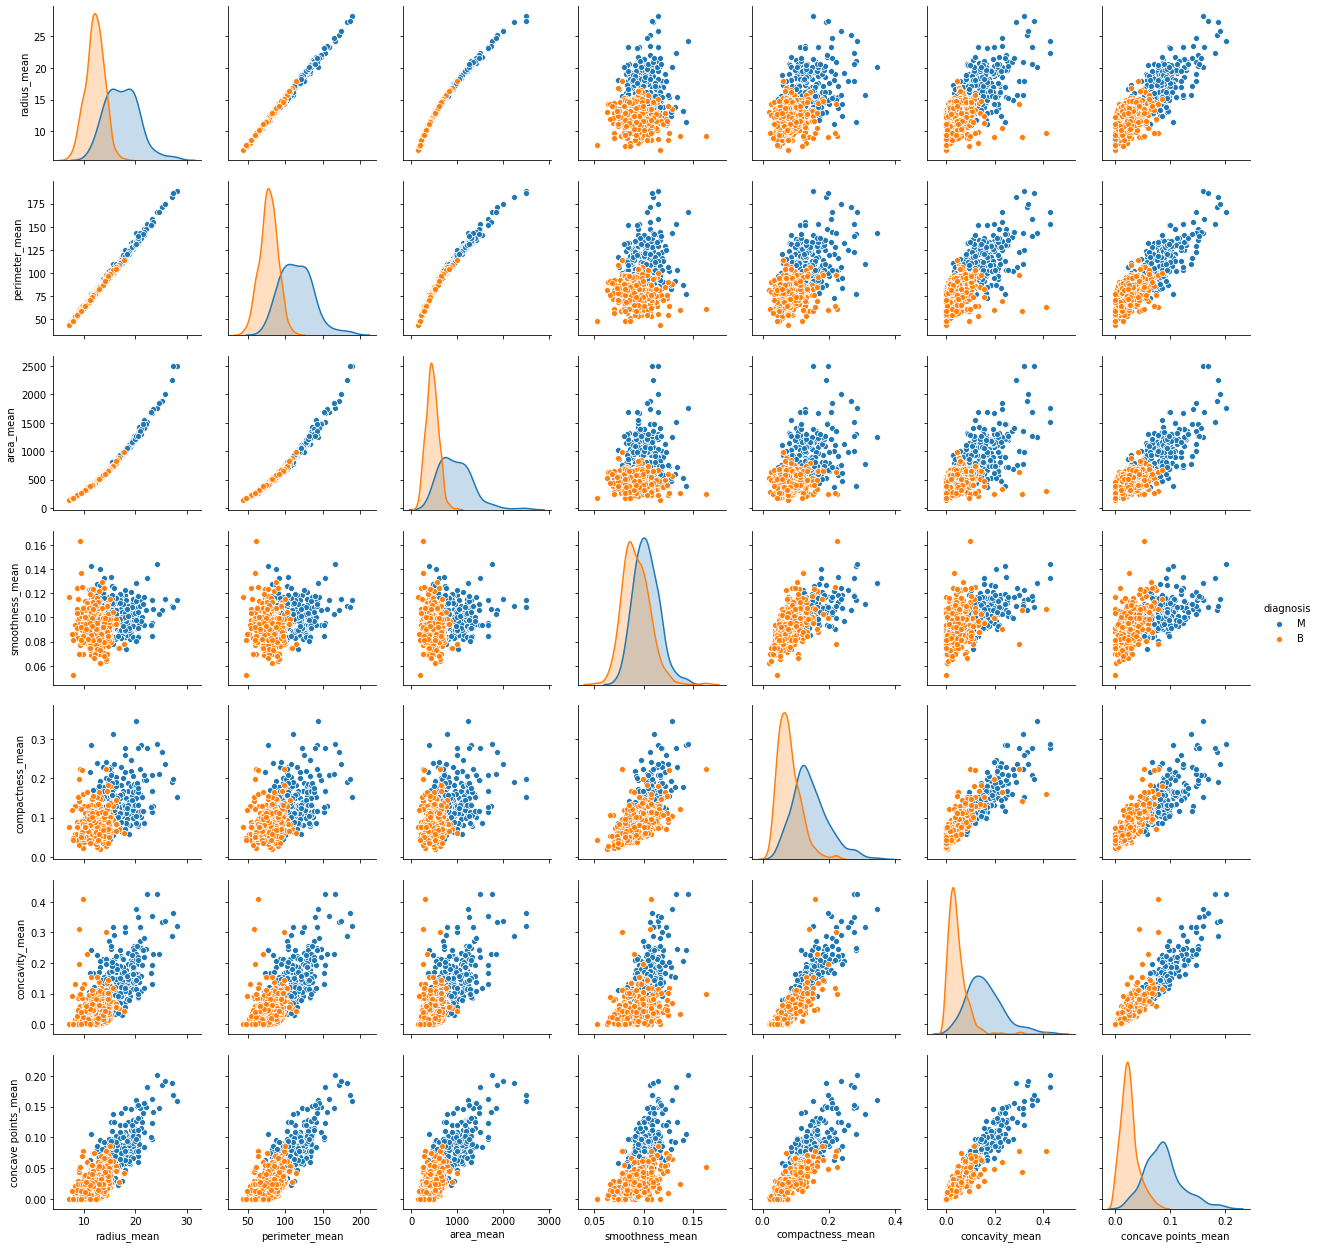

In [10]:
sns.pairplot(cancer, hue='diagnosis',vars=['radius_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean'])

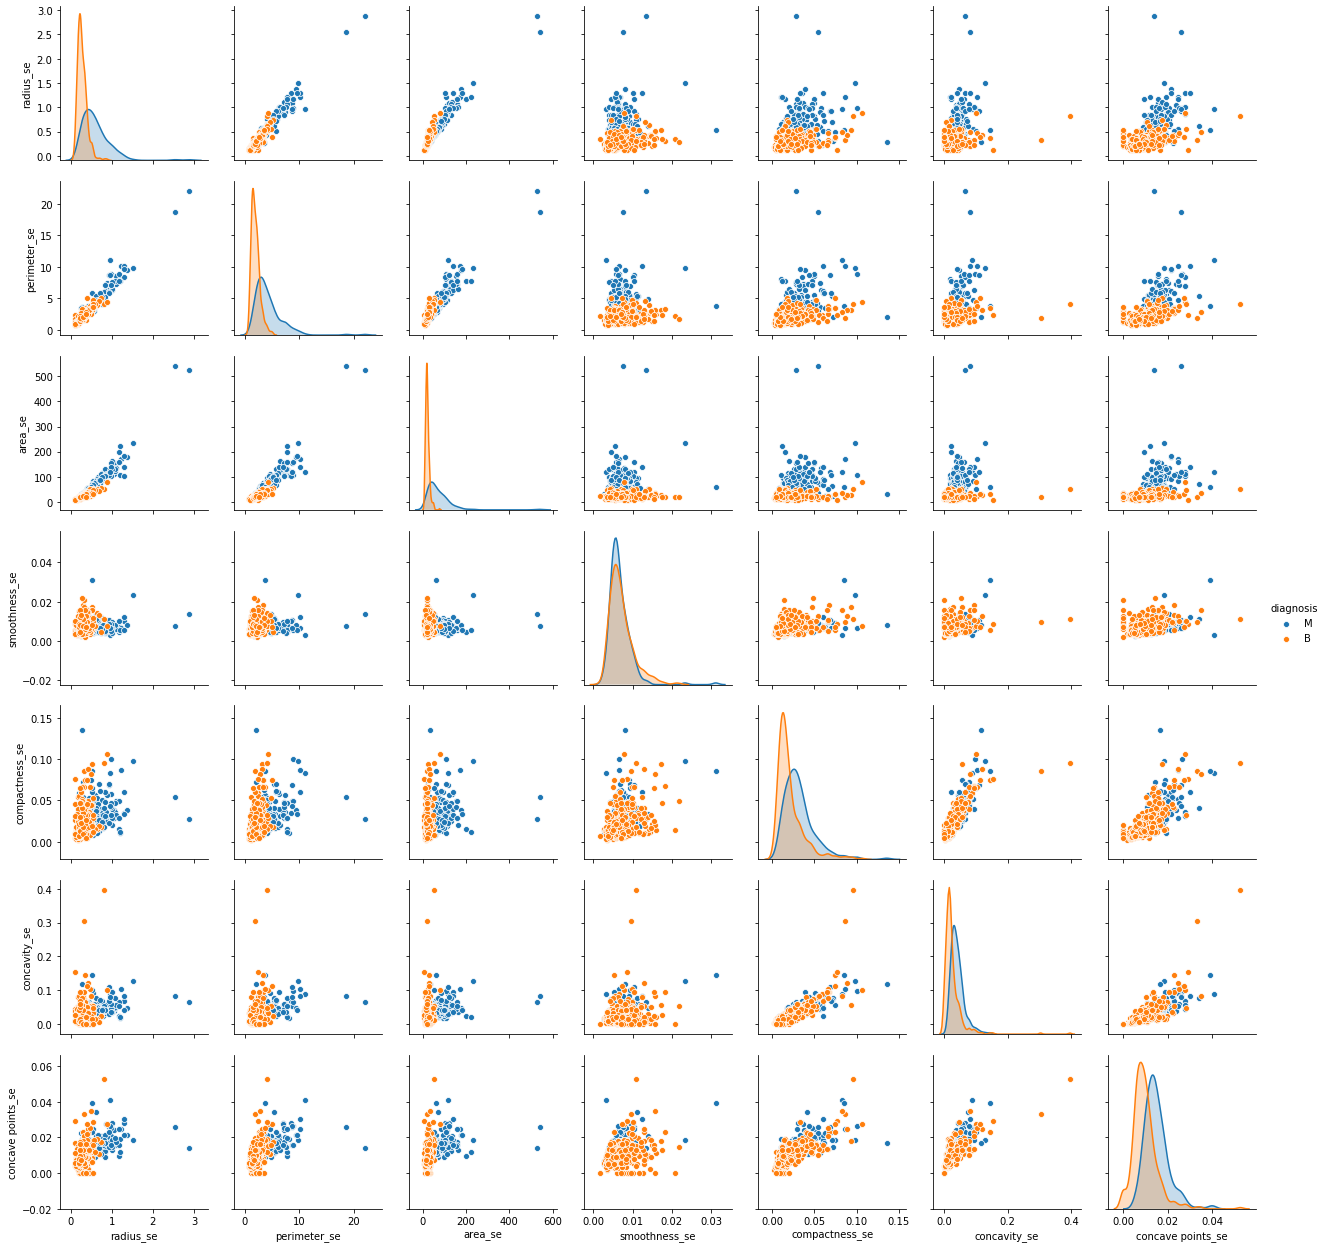

In [11]:
sns.pairplot(cancer, hue='diagnosis',vars=['radius_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se'])

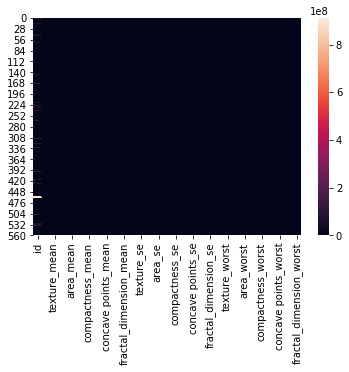

In [12]:
cancer1=cancer.drop(['diagnosis'],axis=1)
sns.heatmap(cancer1, fmt="d")

# FEATURE ENGINEERIMG

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=7)

In [15]:
principalComponents = pca.fit_transform(cancer1)

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])

In [17]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-2.952953e+07,1176.590041,-294.913581,51.007560,-8.517369,31.505780,1.260652
1,-2.952931e+07,1285.749615,14.460640,-33.559074,17.863095,-4.529803,-0.230496
2,5.392907e+07,965.498486,39.839016,-2.959418,4.170464,-0.292485,-2.648031
3,5.397647e+07,-437.551998,-66.111302,6.675288,-11.771096,7.422798,1.308459
4,5.398657e+07,900.073378,190.054022,-0.136151,8.496560,7.796324,1.027825
...,...,...,...,...,...,...,...
564,-2.944541e+07,1430.693656,109.118664,41.845954,6.605036,-5.553879,-0.405762
565,-2.944515e+07,1061.599145,76.039711,1.596501,-4.765256,-12.637222,-0.068406
566,-2.944488e+07,331.077904,46.814381,-9.307757,-9.776843,-6.244048,-0.872997
567,-2.944459e+07,1141.435887,33.042719,-17.982016,-23.623079,3.480587,4.085244


In [18]:
principalDf=pd.concat([principalDf,cancer['diagnosis']],axis=1)

In [19]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,diagnosis
0,-2.952953e+07,1176.590041,-294.913581,51.007560,-8.517369,31.505780,1.260652,M
1,-2.952931e+07,1285.749615,14.460640,-33.559074,17.863095,-4.529803,-0.230496,M
2,5.392907e+07,965.498486,39.839016,-2.959418,4.170464,-0.292485,-2.648031,M
3,5.397647e+07,-437.551998,-66.111302,6.675288,-11.771096,7.422798,1.308459,M
4,5.398657e+07,900.073378,190.054022,-0.136151,8.496560,7.796324,1.027825,M
...,...,...,...,...,...,...,...,...
564,-2.944541e+07,1430.693656,109.118664,41.845954,6.605036,-5.553879,-0.405762,M
565,-2.944515e+07,1061.599145,76.039711,1.596501,-4.765256,-12.637222,-0.068406,M
566,-2.944488e+07,331.077904,46.814381,-9.307757,-9.776843,-6.244048,-0.872997,M
567,-2.944459e+07,1141.435887,33.042719,-17.982016,-23.623079,3.480587,4.085244,M


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
principalDf['diagnosis'] =le.fit_transform(principalDf['diagnosis'])

In [23]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,diagnosis
0,-2.952953e+07,1176.590041,-294.913581,51.007560,-8.517369,31.505780,1.260652,1
1,-2.952931e+07,1285.749615,14.460640,-33.559074,17.863095,-4.529803,-0.230496,1
2,5.392907e+07,965.498486,39.839016,-2.959418,4.170464,-0.292485,-2.648031,1
3,5.397647e+07,-437.551998,-66.111302,6.675288,-11.771096,7.422798,1.308459,1
4,5.398657e+07,900.073378,190.054022,-0.136151,8.496560,7.796324,1.027825,1
...,...,...,...,...,...,...,...,...
564,-2.944541e+07,1430.693656,109.118664,41.845954,6.605036,-5.553879,-0.405762,1
565,-2.944515e+07,1061.599145,76.039711,1.596501,-4.765256,-12.637222,-0.068406,1
566,-2.944488e+07,331.077904,46.814381,-9.307757,-9.776843,-6.244048,-0.872997,1
567,-2.944459e+07,1141.435887,33.042719,-17.982016,-23.623079,3.480587,4.085244,1


In [24]:
principalDf['diagnosis'].unique()

array([1, 0], dtype=int64)

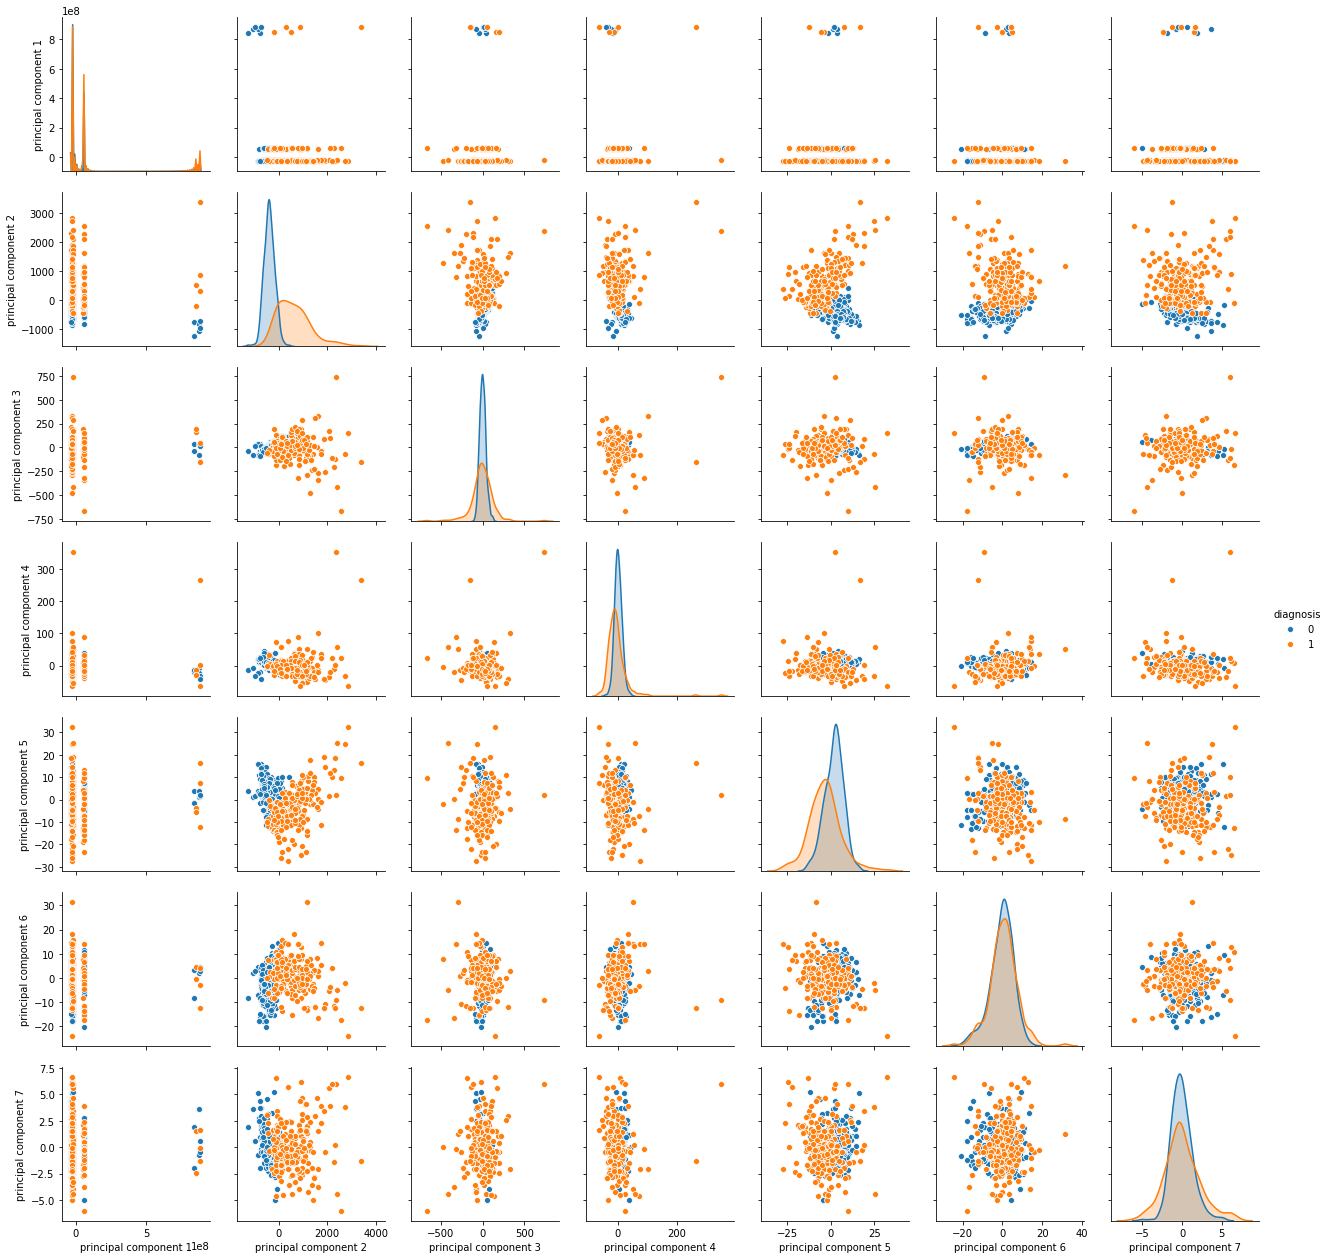

In [25]:
sns.pairplot(principalDf, hue='diagnosis',vars=['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])

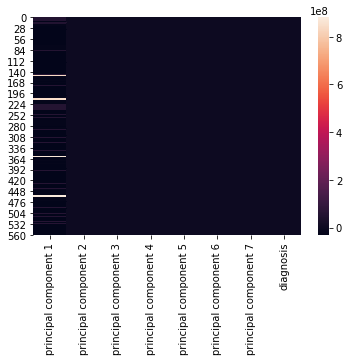

In [26]:
sns.heatmap(principalDf, fmt="d")

In [4]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


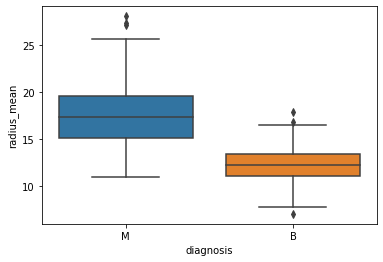

In [13]:
sns.boxplot(x=cancer['diagnosis'],y=cancer['radius_mean'],data=cancer)

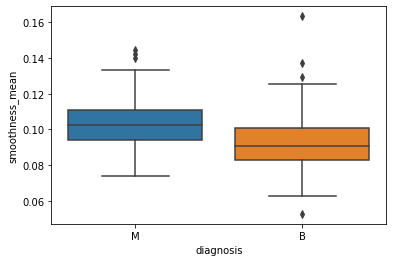

In [15]:
sns.boxplot(x=cancer['diagnosis'],y=cancer['smoothness_mean'],data=cancer)

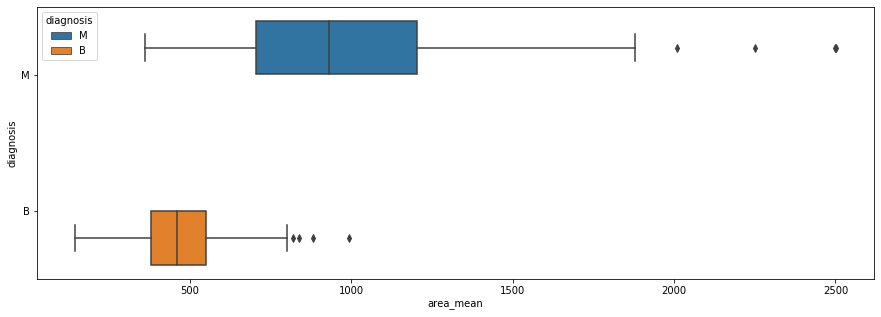

In [21]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=cancer['area_mean'],y=cancer['diagnosis'],hue="diagnosis",data=cancer,ax=ax)

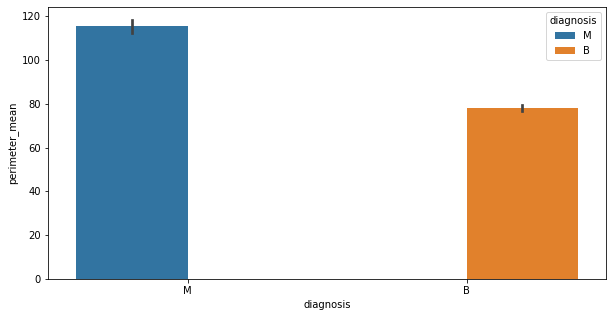

In [26]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="diagnosis", y="perimeter_mean",  hue="diagnosis",data=cancer,ax=ax)

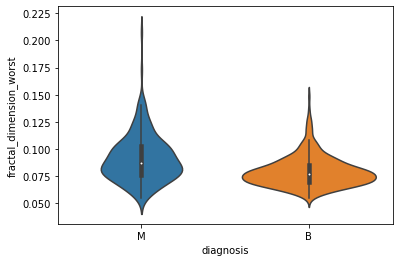

In [28]:
sns.violinplot(x=cancer['diagnosis'],y=cancer['fractal_dimension_worst'],data=cancer)

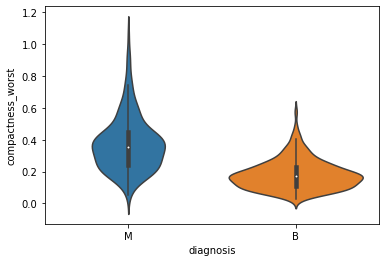

In [31]:
sns.violinplot(x=cancer['diagnosis'],y=cancer['compactness_worst'],data=cancer)

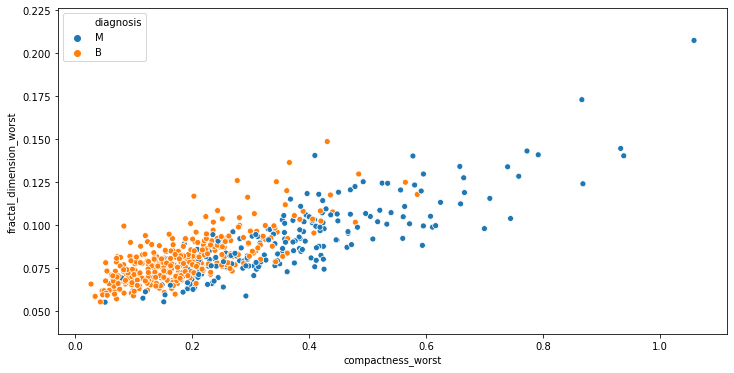

In [33]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x="compactness_worst", y="fractal_dimension_worst", hue="diagnosis", data=cancer,ax=ax)

# SEPAERATING X AND Y

In [27]:
x =principalDf.drop(['diagnosis'],axis=1)
y =principalDf['diagnosis']

In [28]:
x

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-2.952953e+07,1176.590041,-294.913581,51.007560,-8.517369,31.505780,1.260652
1,-2.952931e+07,1285.749615,14.460640,-33.559074,17.863095,-4.529803,-0.230496
2,5.392907e+07,965.498486,39.839016,-2.959418,4.170464,-0.292485,-2.648031
3,5.397647e+07,-437.551998,-66.111302,6.675288,-11.771096,7.422798,1.308459
4,5.398657e+07,900.073378,190.054022,-0.136151,8.496560,7.796324,1.027825
...,...,...,...,...,...,...,...
564,-2.944541e+07,1430.693656,109.118664,41.845954,6.605036,-5.553879,-0.405762
565,-2.944515e+07,1061.599145,76.039711,1.596501,-4.765256,-12.637222,-0.068406
566,-2.944488e+07,331.077904,46.814381,-9.307757,-9.776843,-6.244048,-0.872997
567,-2.944459e+07,1141.435887,33.042719,-17.982016,-23.623079,3.480587,4.085244


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

# TRAIN TEST SPLIT

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [32]:
x_train.shape

(398, 7)

In [33]:
x_test.shape

(171, 7)

In [34]:
y_train.shape

(398,)

In [35]:
y_test.shape

(171,)

# LOGISTIC MODEL

In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
Logisclassifier = LogisticRegression(random_state = 95) 

In [38]:
Logisclassifier.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=95, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
LOGy_pred = Logisclassifier.predict(x_test) 

In [40]:
from sklearn.metrics import confusion_matrix 

In [41]:
cmLog = confusion_matrix(y_test, LOGy_pred) 

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
LogisticAccuracy=accuracy_score(y_test,LOGy_pred)
LogisticAccuracy

0.9473684210526315

# RANDOM FOREST MODEL

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Classmodel = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [46]:
Classfit=Classmodel.fit(x_train, y_train)

In [47]:
y_pred = Classmodel.predict(x_test)

In [48]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_pred,y_test)

array([[107,   3],
       [  1,  60]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
RFAccu = accuracy_score(y_test,y_pred)
RFAccu

0.9766081871345029

# NAIVE BAYES MODEL

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
classifier = GaussianNB()

In [55]:
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_predG = Classmodel.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_predG,y_test)

array([[107,   3],
       [  1,  60]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
NaiveBayesAccu= accuracy_score(y_test,y_predG)
NaiveBayesAccu

0.9766081871345029

# XGBoost MODEL 

In [61]:
from xgboost import XGBClassifier

In [62]:
XGBModel = XGBClassifier(n_estimators=110,learning_rate=0.05,max_depth=3)

In [63]:
XGBModel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
y_predXg = XGBModel.predict(x_test)

In [65]:
predictions = [round(value) for value in y_predXg]

In [66]:
XGBaccuracy = accuracy_score(y_test, predictions)
XGBaccuracy

0.9707602339181286

# SVM MODEL

In [89]:
from sklearn import svm
from sklearn.svm import SVC

In [90]:
classifierSVM = svm.SVC(kernel='rbf')

In [91]:
classifierSVM.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
prediction1_SVM = classifierSVM.predict(x_test)

In [93]:
Conf = confusion_matrix(y_test, prediction1_SVM)
Conf

array([[108,   0],
       [ 63,   0]], dtype=int64)

In [94]:
accuracySVM =accuracy_score(y_test,prediction1_SVM)
accuracySVM

0.631578947368421

# DECISION TREE

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
Desclassifier = DecisionTreeClassifier(criterion='gini' ,random_state=42)

In [97]:
classifier = Desclassifier.fit(x_train,y_train)

In [98]:
y_pred = Desclassifier.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_pred,y_test)

array([[102,   5],
       [  6,  58]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuD =accuracy_score(y_test,y_pred)
accuD

0.935672514619883

In [106]:
FinalAccu ={'Model':['Logistic Regression', 'Random Forest', 'Naive Bayes','XGBoost','Decision Tree', 'Support Vector Machine'],
        'Accuracy':[LogisticAccuracy,RFAccu,NaiveBayesAccu,XGBaccuracy,accuD,accuracySVM]}
FinalAccu =pd.DataFrame(FinalAccu)
FinalAccu

,Model,Accuracy
0,Logistic Regression,0.947368
1,Random Forest,0.976608
2,Naive Bayes,0.976608
3,XGBoost,0.970760
4,Decision Tree,0.935673
5,Support Vector Machine,0.631579
